In [4]:
# Download and Clean the Data
import numpy as np
import pandas as pd
import zipfile
import urllib.request
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

# url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00296/dataset_diabetes.zip'
# filename = 'dataset_diabetes.zip'
# urllib.request.urlretrieve(url, filename)

# with zipfile.ZipFile(filename, 'r') as zip_ref:
    # zip_ref.extractall('data')

diabetic_data = pd.read_csv('data/dataset_diabetes/diabetic_data.csv', header=0, quotechar='"')

# drop columns with more than 30% missing values
diabetic_data = diabetic_data.drop(['weight', 'payer_code', 'medical_specialty'], axis=1)

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
le = LabelEncoder()




label_encoding_columns = ['race', 'gender', 'diag_1', 'diag_2', 'diag_3',
            'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
            'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide',
            'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol',
            'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'insulin',
            'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone',
            'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed']

for col in label_encoding_columns:
    diabetic_data[col] = le.fit_transform(diabetic_data[col])

# create binary values for readmitted column
diabetic_data['readmitted'] = diabetic_data['readmitted'].apply(lambda x: 0 if x in ['NO', '>30'] else 1)


oe = OrdinalEncoder(categories=[['[0-10)', '[10-20)', '[20-30)', '[30-40)', '[40-50)', '[50-60)', '[60-70)', '[70-80)', '[80-90)', '[90-100)']], dtype=int)
diabetic_data['age'] = oe.fit_transform(diabetic_data[['age']])


seed = 123
np.random.seed(seed) 


In [5]:
# Create 20% testing and 80% training data set split
X = diabetic_data.drop(columns=['readmitted'])
Y = diabetic_data['readmitted']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=seed)

In [16]:
# Logistic Regression -> hw3
from sklearn.linear_model import LogisticRegression

# create a logistic regression model
model = LogisticRegression()

# fit the model to the training data
model.fit(X_train, y_train)

# make predictions on the test data
y_pred = model.predict(X_test)

# evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy}')


Accuracy: 0.8887273013127899


In [3]:
# SVM Classifier (TODO)


(81412, 49)


In [5]:
# Neural Network Classifier

from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = MLPClassifier(hidden_layer_sizes=(16, 8), activation='relu', solver='adam', alpha=0.001, max_iter=20, validation_fraction=0.1, random_state=seed)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy}')


Accuracy: 0.8885307758823991


C:\Users\nikit\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


C:\Users\nikit\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:598: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\nikit\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\nikit\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


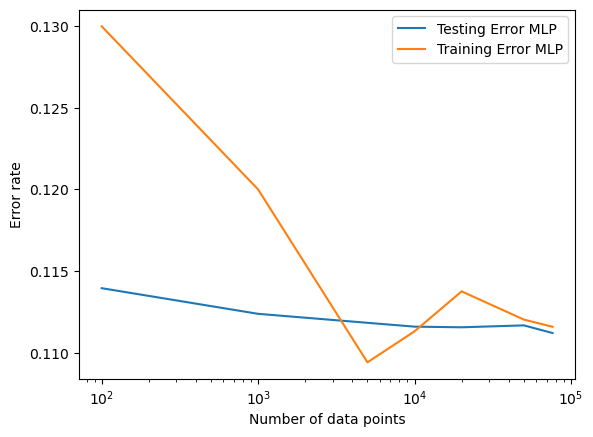

In [15]:
# perform nueral network with different training sizes
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt


train_sizes = [100, 1000, 5000, 10000, 20000, 50000, 76324]

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


training_errors_mlp = []
testing_errors_mlp = []
# Train your neural network model with each data size m and given hyperparameter value
for m_tr in train_sizes:
 #mlp =  MLPClassifier(hidden_layer_sizes=(16, 8), activation='relu', solver='adam', alpha=0.001, max_iter=20, validation_fraction=0.1, random_state=seed)
 mlp = MLPClassifier(hidden_layer_sizes=(64), random_state=seed, solver='sgd', batch_size=256)
 mlp.fit(X_train[:m_tr], y_train[:m_tr])
 # Compute the training and test error rates
 training_errors_mlp.append(1 - mlp.score(X_train[:m_tr], y_train[:m_tr]))
 testing_errors_mlp.append(1 - mlp.score(X_test, y_test))

# Plot the resulting performance as a function of m
plt.semilogx(train_sizes, testing_errors_mlp, label="Testing Error MLP")
plt.semilogx(train_sizes, training_errors_mlp, label="Training Error MLP")
plt.legend(loc='upper right')
plt.xlabel('Number of data points')
plt.ylabel('Error rate')
plt.show()



C:\Users\nikit\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\nikit\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\nikit\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\nikit\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


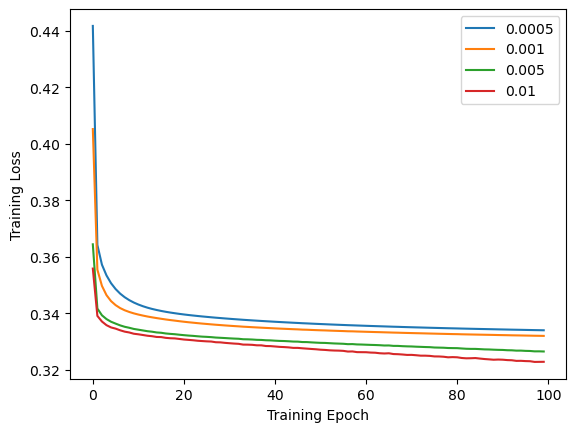

In [16]:
# Optimization Curves
learning_rates = [0.0005, 0.001, 0.005, 0.01]

for lr in learning_rates:
    mlp = MLPClassifier(hidden_layer_sizes=(64), random_state=seed, solver='sgd',
                        batch_size=256, n_iter_no_change=100, max_iter=100, learning_rate_init=lr)
    mlp.fit(X_train, y_train)   
    # Compute the training and test error rates for each model
    # Plot the training loss curve for each setting (single plot) & compare
    plt.plot(mlp.loss_curve_, label=str(lr))  
plt.xlabel('Training Epoch')
plt.ylabel('Training Loss')
plt.legend(loc='upper right')
plt.show()

In [20]:
from sklearn.model_selection import cross_val_score

scaler = StandardScaler()
X = scaler.fit_transform(X_train)
model = MLPClassifier(hidden_layer_sizes=(16, 8), activation='relu', solver='adam', alpha=0.001, max_iter=20, random_state=seed)

# perform 5-fold cross-validation
scores = cross_val_score(model, X, y_train, cv=5)

print(f'Scores: {scores}')
print(f'Mean accuracy: {scores.mean()}')

C:\Users\nikit\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\nikit\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\nikit\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\nikit\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


Scores: [0.88883066 0.88856862 0.88850311 0.88824107 0.88829927]
Mean accuracy: 0.888488546338241


C:\Users\nikit\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


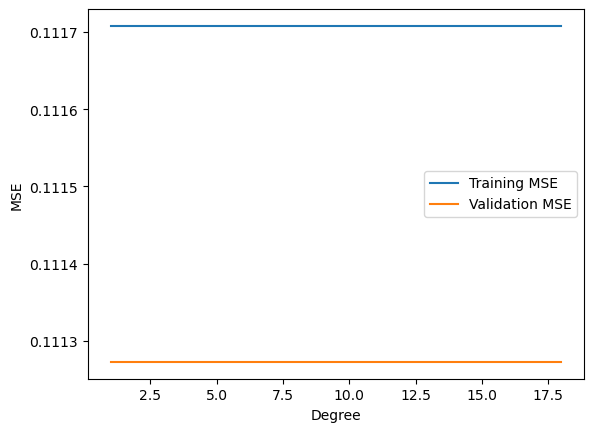

In [16]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, zero_one_loss

degrees = [1, 3, 5, 7, 10, 15, 18]
train_mse = []
val_mse = []

# Loop over the degrees
for degree in degrees:
    mlp = MLPClassifier(hidden_layer_sizes=(degree,),  random_state=seed, solver='sgd', batch_size=256)
    mlp.fit(X_train, y_train)
    train_pred = mlp.predict(X_train)
    train_mse.append(1- accuracy_score(y_train, train_pred))
    val_pred = mlp.predict(X_test)
    val_mse.append(1- accuracy_score(y_test, val_pred))


# Plot the results
plt.plot(degrees, train_mse, label='Training MSE')
plt.plot(degrees, val_mse, label='Validation MSE')
plt.xlabel('Degree')
plt.ylabel('MSE')
plt.legend()
plt.show()

In [18]:
# Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=seed)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy}')

Accuracy: 0.8888059114849461


In [18]:
# Bagged Ensemble

import sklearn.tree as tree

nBag = 50
nUse = 10000
m, n = X_train.shape

classifiers = [None]*nBag
for i in range(nBag):
    ind = np.floor(m*np.random.rand(nUse)).astype(int)
    Xi, Yi= X_train[ind,:], y_train[ind]
    learner = tree.DecisionTreeClassifier(max_features=50, max_depth=15, min_samples_leaf=1, random_state=seed)
    learner.fit(Xi, Yi)
    classifiers[i] = learner


[[-0.76064841 -0.98803806  0.42479488 ... -0.0036197   0.92768959
   0.54692953]
 [ 0.97800704  1.28302213  0.42479488 ... -0.0036197  -1.07794677
   0.54692953]
 [ 0.07226282  0.13657821  1.49183602 ... -0.0036197  -1.07794677
   0.54692953]
 ...
 [-0.97870449 -0.87852467  0.42479488 ... -0.0036197   0.92768959
  -1.8283891 ]
 [-0.71715916 -0.76816453  0.42479488 ... -0.0036197  -1.07794677
   0.54692953]
 [-1.02639447 -1.31787801  0.42479488 ... -0.0036197   0.92768959
   0.54692953]]


KeyError: '[28057, 13401, 8598, 51717, 72929, 73580, 41670, 14082, 11388, 23428, 56097, 59267, 20285, 63200, 57270, 72123, 26447, 19455, 26612, 30605, 32723, 40246, 25715, 68133, 64996, 11042, 5272, 74416, 36446, 35491, 66802, 1216, 52866, 57969, 22323, 11709, 32414, 50771, 39829, 12968, 64340, 41566, 68837, 44163, 29605, 67513, 30445, 27048, 35274, 38102, 34916, 58106, 65789, 72500, 46768, 20554, 54543, 70774, 24522, 25923, 35811, 68838, 16662, 45784, 12886, 51713, 70071, 20579, 44324, 47533, 73969, 9689, 66710, 44352, 53391, 16372, 44504, 24880, 455, 33722, 29909, 33609, 65135, 64268, 16678, 13226, 44391, 26252, 10341, 50275, 13781, 8128, 61444, 6480, 19235, 9671, 45116, 63994, 58227, 25149, 9027, 37180, 65563, 65245, 73357, 14849, 16917, 12321, 62047, 4207, 17722, 54759, 30912, 53199, 41172, 1089, 23637, 59715, 2581, 49375, 33458, 24060, 50169, 36532, 1513, 23271, 45086, 67907, 8540, 46627, 72744, 58779, 60059, 33645, 434, 27301, 56232, 35142, 49636, 32615, 30757, 37530, 38156, 15601, 37458, 8097, 16214, 19686, 42324, 39194, 46059, 14586, 30133, 865, 67833, 64190, 44786, 12697, 53220, 58142, 11555, 70915, 2810, 55056, 16350, 31407, 8710, 49634, 38574, 40589, 30811, 58487, 19453, 47538, 49011, 59415, 23558, 65144, 50652, 11613, 58038, 6389, 58253, 19934, 22635, 30795, 65094, 64256, 66693, 68916, 66830, 18370, 37626, 125, 18812, 23666, 25380, 47375, 36487, 46130, 23037, 69812, 33336, 64718, 38853, 55668, 68123, 18026, 65441, 59759, 19702, 4422, 2559, 13857, 22391, 7619, 56254, 57503, 247, 45692, 65559, 75271, 16040, 23376, 13484, 15011, 24472, 19546, 59924, 20589, 54928, 47958, 6068, 59428, 23581, 45254, 67421, 47658, 43916, 6468, 45920, 62974, 49165, 47931, 36292, 65421, 459, 8326, 52277, 47265, 55061, 41272, 10331, 52262, 71039, 18558, 54180, 19555, 42320, 30378, 7137, 54594, 56797, 46970, 7283, 19181, 73921, 2026, 27840, 30364, 71267, 11013, 22414, 59646, 73413, 66123, 2097, 48688, 26993, 43707, 3517, 46369, 31204, 36971, 67143, 5177, 49834, 28191, 50495, 2675, 38169, 34993, 36484, 63039, 49250, 67959, 58065, 25626, 47589, 71688, 26870, 4184, 72666, 64484, 43320, 13792, 16458, 17609, 32046, 71379, 27416, 31462, 9504, 19361, 65044, 4524, 59916, 33681, 38942, 66279, 51678, 38303, 12831, 54384, 17971, 49680, 48042, 9782, 54867, 39700, 13957, 60282, 48913, 63543, 49001, 46012, 20485, 68769, 75732, 73874, 11685, 35968, 47832, 32300, 51609, 24140, 73767, 74758, 49645, 24694, 68362, 8298, 19432, 6053, 58923, 44370, 38060, 58192, 68483, 20777, 25641, 38264, 22976, 26220, 9775, 51990, 52990, 30765, 7094, 29714, 59765, 7239, 23830, 59427, 1370, 783, 8586, 30451, 68319, 25747, 70872, 12159, 15952, 71321, 1097, 16300, 33182, 10081, 941, 45189, 57873, 31317, 28005, 74868, 52480, 66398, 36472, 66500, 36349, 41391, 39690, 17577, 64184, 40332, 59498, 29780, 56418, 2656, 8570, 16326, 34223, 51912, 73461, 48674, 43013, 41337, 57357, 17493, 70647, 42030, 8723, 76275, 2827, 46918, 7469, 51795, 3243, 43651, 35006, 6430, 485, 54595, 35302, 24489, 67260, 35323, 71897, 34075, 21760, 32990, 60252, 5139, 61416, 14604, 8177, 65448, 7967, 29458, 62219, 41798, 10955, 21536, 19932, 70176, 45445, 34456, 64091, 23621, 19575, 28901, 13256, 12299, 52908, 42760, 35660, 17656, 62882, 66987, 8217, 15258, 44803, 28892, 21564, 39895, 46654, 40474, 51221, 48598, 28434, 50386, 48470, 33736, 55019, 1820, 53762, 1834, 52749, 58504, 16881, 1837, 31670, 48259, 73638, 29419, 19952, 32383, 65612, 69030, 75516, 11535, 21664, 19796, 2500, 71041, 45574, 14920, 28308, 31242, 50099, 62400, 28636, 68515, 75084, 63506, 7332, 32182, 43941, 15391, 70311, 13023, 24681, 61135, 32587, 42966, 15018, 29475, 6194, 32219, 65136, 26738, 28451, 76213, 68414, 23435, 5925, 44538, 58355, 31946, 41203, 7477, 23537, 57444, 33100, 69178, 6407, 53991, 67970, 44764, 57827, 24143, 65464, 6781, 19817, 73352, 25899, 53652, 3711, 18788, 12302, 20277, 65017, 33651, 19764, 47576, 22234, 7298, 18214, 16287, 54377, 8677, 2181, 75301, 72275, 32062, 54590, 34586, 3877, 44521, 60912, 14439, 3152, 57191, 22379, 19708, 20342, 55574, 61503, 46890, 50496, 59285, 54796, 57263, 19782, 18855, 15476, 26568, 59528, 933, 22721, 60022, 56105, 43709, 20272, 73370, 71779, 41122, 25422, 47896, 36304, 1305, 73721, 33775, 25418, 28170, 6971, 19395, 39928, 48192, 52086, 68411, 59459, 22203, 14803, 8452, 60606, 49578, 62439, 56753, 33350, 59327, 9425, 58976, 68875, 67570, 30998, 14453, 44935, 58860, 47401, 62296, 35448, 21358, 27744, 1000, 19582, 50326, 11012, 47421, 51126, 17981, 73374, 7225, 62168, 41151, 11686, 18699, 7673, 46446, 19915, 61255, 19882, 35653, 1520, 11196, 11268, 25435, 33878, 3177, 8178, 37665, 10634, 13537, 66561, 56561, 4788, 30633, 58209, 9185, 70216, 17736, 65032, 27099, 34982, 7945, 67532, 70615, 14220, 3571, 29599, 56315, 68785, 1225, 68902, 20320, 26644, 62842, 25322, 8324, 53640, 27648, 76180, 16494, 62385, 49924, 66680, 22325, 64435, 20299, 43744, 20163, 21898, 44910, 20832, 9783, 37606, 74354, 32230, 60034, 1982, 48137, 50905, 2791, 68310, 4909, 67145, 60662, 11199, 43700, 21530, 49004, 18711, 28765, 53390, 62510, 2800, 6036, 32874, 58664, 52487, 57542, 51896, 33538, 8972, 39075, 17607, 72683, 55438, 23011, 35162, 68993, 58590, 26178, 6975, 14186, 40173, 33616, 25232, 50964, 19145, 49556, 55425, 31886, 6449, 73613, 10559, 38270, 38032, 28769, 31363, 75335, 12944, 29377, 23946, 46928, 51219, 1547, 1923, 24902, 41891, 450, 69263, 42007, 50696, 11465, 27090, 50278, 1351, 58564, 18213, 51360, 26085, 31391, 58970, 59576, 57510, 11624, 42052, 61216, 23820, 64506, 28825, 58085, 42751, 6717, 51728, 72790, 52401, 69743, 11559, 42432, 38313, 64492, 28949, 45311, 2805, 48263, 58777, 38369, 30796, 30532, 61843, 46762, 58087, 25128, 41007, 24227, 18794, 18616, 55529, 62799, 18759, 11213, 17311, 15434, 27885, 57504, 45397, 47718, 29174, 66094, 2475, 2308, 16388, 66256, 25681, 18050, 2734, 31554, 34716, 48456, 34530, 61813, 66935, 2666, 1124, 47423, 73673, 41197, 4702, 31850, 12796, 50054, 25886, 57032, 54949, 15465, 45853, 45804, 72445, 34706, 30951, 36655, 48673, 51741, 53900, 60854, 68758, 28611, 58382, 10951, 53487, 3176, 50105, 38707, 37634, 61756, 66961, 16425, 49124, 41682, 45179, 32851, 53064, 57828, 33885, 30034, 73155, 63544, 20734, 27486, 27218, 57099, 46761, 59582, 966, 72269, 21096, 55144, 42187, 37883, 58801, 12271, 68534, 39036, 49095, 10574, 21122, 60193, 43018, 22871, 31629, 44973, 69680, 68514, 39074, 63146, 75106, 63527, 76166, 47750, 46942, 12838, 23039, 13912, 36064, 49656, 1970, 30093, 30420, 74695, 33159, 33180, 72001, 46561, 25012, 75086, 70439, 37247, 68287, 25893, 31854, 51559, 23073, 46767, 34241, 28546, 49365, 22592, 53181, 32466, 28581, 71289, 18681, 66192, 38567, 42735, 62571, 10844, 22179, 68222, 23492, 24348, 66891, 76203, 45060, 66124, 43937, 8892, 9537, 3147, 75591, 46939, 63786, 70832, 31585, 28460, 24080, 56178, 10601, 65098, 73982, 11834, 44615, 42817, 75921, 34352, 15940, 13903, 47405, 9609, 69456, 44317, 39333, 45859, 46897, 73905, 5905, 34667, 53338, 72808, 19636, 11041, 71820, 43629, 30820, 5814, 33302, 14877, 19483, 13704, 44205, 4208, 16008, 32350, 9995, 15104, 44684, 56227, 26876, 44822, 41168, 4720, 52563, 59074, 36231, 7475, 10107, 65785, 35378, 17435, 39606, 61283, 36862, 12101, 20146, 56474, 49958, 24600, 39955, 63212, 12556, 68161, 6635, 40679, 12331, 74086, 19160, 50491, 26259, 58247, 3324, 27630, 81, 12425, 6188, 56354, 3226, 73030, 18861, 32384, 73932, 64559, 39083, 20465, 3125, 18827, 59905, 45353, 40116, 70800, 63849, 28182, 34038, 69075, 73660, 20030, 30957, 1662, 57022, 58527, 26573, 74090, 33283, 51787, 61634, 10796, 58676, 15549, 25324, 10072, 10179, 53072, 15312, 74167, 48041, 65033, 37272, 28288, 40635, 44464, 72084, 50989, 26710, 46160, 70358, 58989, 7185, 60012, 3764, 72762, 63024, 68498, 34432, 5863, 61517, 25655, 68772, 51294, 3955, 70867, 9195, 15378, 67720, 51662, 23577, 74343, 9014, 42559, 6321, 68127, 42083, 36203, 64577, 26018, 38922, 16718, 67381, 573, 64001, 35101, 37689, 4220, 43603, 43722, 48974, 20949, 62824, 10944, 7415, 63523, 12972, 28659, 43219, 52853, 66158, 62525, 3526, 53447, 33468, 72703, 45718, 8357, 10579, 41406, 45471, 51900, 59353, 45451, 69109, 8318, 53031, 74211, 1710, 6681, 629, 34792, 59315, 45173, 46591, 4348, 8108, 70909, 67946, 50783, 67133, 44920, 72696, 57936, 69831, 11821, 71119, 32835, 42989, 2926, 18183, 53727, 1461, 44217, 68952, 47774, 32362, 32177, 11733, 23218, 33023, 72830, 47366, 74518, 32169, 21176, 2306, 40311, 64606, 11765, 5630, 66597, 74085, 59474, 7247, 44644, 7734, 50209, 55407, 30643, 29401, 38997, 68774, 30086, 46478, 8944, 45380, 58007, 44914, 58684, 14265, 21130, 43528, 74174, 52647, 63439, 69607, 76242, 41977, 47854, 50395, 67405, 18236, 21766, 50999, 25466, 35569, 43834, 32619, 57438, 27108, 336, 28103, 45750, 3043, 66824, 69254, 37881, 68901, 72039, 17480, 69663, 57250, 10083, 8515, 74692, 69544, 73060, 33543, 75220, 72849, 43724, 7092, 3656, 43652, 68578, 44834, 56724, 2166, 63003, 17163, 61640, 22368, 6505, 24064, 71038, 9313, 68702, 37120, 32611, 42333, 43711, 45685, 55912, 51443, 968, 76162, 65582, 57801, 32881, 65801, 39077, 42872, 9967, 17068, 74378, 13607, 55859, 52636, 50537, 45422, 36442, 14824, 27834, 13248, 75190, 28484, 5115, 58034, 28298, 63447, 54603, 29808, 15464, 75458, 19320, 19732, 65188, 44008, 50447, 11815, 51424, 17140, 46760, 36389, 52690, 14055, 27679, 2760, 65372, 7338, 6315, 11391, 73028, 58588, 41550, 20352, 33338, 28333, 22101, 72558, 35641, 58182, 63938, 70866, 14325, 10165, 16580, 57775, 41341, 59233, 65682, 67237, 2788, 15189, 40573, 29922, 6749, 2984, 20187, 43261, 38278, 38202, 33784, 53400, 24539, 72055, 8454, 70705, 4483, 19716, 52427, 52575, 9843, 70538, 34852, 72586, 62885, 76044, 32811, 41387, 11794, 74886, 36084, 15860, 54106, 31199, 32416, 69575, 51842, 14358, 74854, 38695, 56583, 4270, 30929, 37218, 23705, 50720, 10261, 31587, 27989, 41548, 14956, 5904, 7051, 6969, 3762, 18694, 41816, 6617, 11081, 47897, 69302, 41384, 28815, 61133, 34592, 21469, 26742, 47066, 71293, 75499, 30071, 36996, 30007, 13443, 14500, 31584, 76141, 40756, 44926, 35508, 13505, 17496, 73369, 12848, 72661, 20183, 15230, 12458, 76113, 14891, 59670, 36527, 35216, 69505, 67356, 17560, 2034, 4380, 64475, 42669, 62853, 12520, 329, 44554, 60523, 31546, 72903, 7776, 67411, 10457, 39679, 18130, 60327, 33653, 14711, 54413, 62890, 54692, 20996, 9482, 65060, 37693, 12442, 4800, 75551, 9552, 13105, 10551, 54765, 48873, 61142, 25992, 66879, 53073, 33377, 54803, 57751, 44921, 71269, 1681, 20618, 30102, 20677, 24807, 12115, 33363, 53154, 47510, 35184, 6112, 50458, 69798, 18320, 62108, 14509, 41946, 34291, 46855, 69946, 70755, 55465, 44138, 43854, 52452, 61559, 59156, 48866, 70687, 23592, 35496, 40515, 2851, 40349, 39751, 65213, 5933, 52104, 27657, 22497, 36093, 41706, 52007, 21218, 45606, 61645, 50417, 61724, 55623, 21943, 52957, 35445, 69326, 70649, 29129, 1588, 31976, 29319, 26234, 3793, 27355, 71031, 55655, 63305, 9158, 13980, 61375, 4299, 56173, 66769, 58559, 17708, 47702, 27029, 59971, 23801, 52246, 34908, 29999, 57842, 69958, 56176, 10899, 37101, 36833, 1422, 74806, 53519, 17040, 18944, 64545, 63715, 38095, 2229, 16107, 40645, 7156, 61145, 38444, 55404, 38234, 17797, 13832, 7165, 58462, 8822, 13307, 41364, 69180, 56152, 67516, 15353, 49077, 23627, 13309, 76024, 12601, 25222, 30221, 24621, 16993, 37546, 76227, 34446, 27991, 76035, 73001, 69561, 41068, 70621, 67613, 30368, 27659, 33472, 7685, 22295, 65834, 15645, 31227, 41529, 17978, 41230, 56769, 64426, 10312, 48959, 34172, 54194, 33478, 33975, 27041, 60257, 2535, 41204, 33874, 44266, 49042, 73978, 6792, 48131, 40024, 48957, 71509, 67085, 35985, 46378, 58012, 24381, 44837, 56455, 24507, 46244, 49594, 42118, 29296, 4173, 34764, 73220, 30991, 31681, 74223, 9973, 36782, 36953, 4357, 10519, 11588, 3814, 146, 20576, 35944, 60265, 56775, 25147, 54110, 72004, 73508, 19374, 71664, 25101, 13844, 72515, 35189, 66147, 72394, 22780, 52366, 27543, 10130, 55517, 35179, 43784, 55048, 75245, 17625, 44560, 23562, 42719, 3364, 41778, 12085, 55122, 31067, 47771, 22469, 9134, 43281, 63846, 2621, 22343, 63672, 29549, 14880, 11244, 45505, 53384, 20599, 55911, 35070, 61313, 51873, 56811, 16613, 38800, 63183, 13457, 13675, 57700, 30821, 34316, 40216, 60716, 46842, 42487, 33406, 72031, 42285, 62919, 33903, 31366, 51372, 69741, 13402, 65491, 76220, 58380, 46227, 27672, 15800, 62751, 14974, 5702, 11986, 70364, 39858, 28673, 31615, 12640, 23518, 55646, 47314, 64776, 7801, 21885, 53485, 19609, 57385, 5505, 32745, 51858, 33474, 10296, 60993, 59410, 74440, 7940, 14751, 30670, 43914, 40685, 51699, 49199, 25011, 6742, 10396, 5461, 10389, 74362, 10177, 7221, 3767, 37687, 16626, 34066, 26431, 35867, 23531, 17195, 68746, 23186, 7329, 65786, 58853, 16062, 37474, 20758, 18550, 8642, 47913, 12853, 48936, 4891, 46870, 15440, 74489, 63084, 64690, 20435, 50858, 723, 44942, 59476, 8132, 31071, 32151, 52198, 32517, 31958, 45887, 8022, 58723, 45757, 37987, 32418, 17832, 60373, 53786, 36069, 15313, 6460, 69651, 69215, 50847, 33820, 24504, 12943, 13296, 70997, 4923, 4532, 7464, 54097, 57296, 31530, 18948, 23372, 58728, 19118, 2577, 57057, 65361, 71314, 74069, 37292, 60542, 24021, 7236, 21339, 74894, 21984, 73089, 7808, 24488, 948, 6927, 27285, 50418, 53791, 16572, 37501, 23745, 46609, 40308, 40476, 61625, 53848, 22794, 26323, 33310, 50725, 23495, 254, 41069, 51326, 31895, 34295, 41846, 46196, 972, 32782, 5047, 14045, 8268, 8611, 5135, 12014, 19464, 28428, 31260, 1591, 59041, 42003, 1720, 44259, 23958, 57023, 3209, 70588, 11015, 23851, 68856, 38550, 61365, 74163, 12779, 63974, 67263, 69385, 7381, 34188, 57190, 73126, 28779, 33146, 18373, 71782, 10374, 46113, 69713, 75448, 29553, 60218, 24464, 32769, 23812, 42041, 50122, 39628, 30008, 50140, 47811, 49668, 18207, 68723, 14504, 3595, 76080, 26255, 54217, 27408, 71337, 58357, 58794, 39093, 4381, 73742, 17644, 70253, 70788, 59368, 42862, 6166, 18412, 46018, 17598, 7900, 38617, 31941, 4701, 25984, 28818, 49075, 28512, 52830, 60702, 33459, 35506, 53151, 71758, 27810, 53193, 66297, 25575, 65041, 17207, 51594, 18309, 63857, 47934, 15679, 64961, 15652, 41498, 29602, 69944, 17411, 25728, 66706, 63669, 17425, 25326, 36578, 28660, 33998, 20585, 17235, 32055, 21977, 10869, 19310, 43420, 37450, 68996, 75117, 35183, 7837, 7560, 15328, 18020, 42098, 57781, 3166, 15154, 7649, 60677, 6545, 71908, 70865, 53087, 65769, 21145, 64848, 52758, 54883, 74530, 76232, 21125, 41292, 34605, 6589, 25411, 19751, 56053, 46990, 18122, 60778, 65677, 43738, 30233, 11274, 17227, 76295, 64050, 10203, 28916, 50719, 26737, 42679, 14100, 50829, 29290, 55164, 15374, 53032, 4339, 14634, 24401, 14441, 47378, 71881, 62273, 8674, 6604, 6018, 31234, 42341, 56522, 45174, 42704, 16181, 58279, 55397, 52035, 374, 249, 53570, 75053, 72332, 68197, 37141, 1810, 17453, 7454, 67679, 53500, 54433, 2499, 47594, 10253, 36914, 25591, 28108, 30540, 42138, 17694, 19790, 44994, 29081, 30513, 69281, 44411, 29921, 40648, 22684, 59909, 6280, 11608, 4567, 43339, 65354, 29082, 15133, 30242, 52603, 51535, 40716, 63411, 480, 37815, 27310, 31757, 56735, 32431, 70156, 32964, 23026, 23328, 32583, 10032, 44900, 16205, 11653, 15794, 37425, 69989, 46791, 72937, 21768, 68950, 14901, 10171, 58229, 25231, 1712, 71350, 33035, 29212, 31147, 24679, 45554, 21876, 8172, 15294, 893, 52528, 21097, 28534, 26945, 58169, 33084, 27930, 20293, 9595, 53782, 75887, 31950, 38483, 6061, 37893, 28399, 58503, 1617, 27402, 5593, 16964, 18657, 7890, 57605, 33621, 26180, 18229, 32318, 39992, 72800, 5170, 2743, 26647, 48111, 914, 39193, 67519, 21645, 13014, 11204, 38632, 27946, 25675, 11101, 53208, 48216, 72076, 41698, 3078, 45892, 24618, 39154, 16539, 25873, 68033, 16105, 73990, 52746, 57337, 11688, 60728, 50516, 36211, 51876, 51139, 1573, 12770, 4762, 39478, 63142, 61825, 14245, 60010, 29792, 63199, 49176, 55135, 7248, 61181, 63256, 24650, 31277, 18612, 44279, 57690, 46536, 27625, 10616, 19420, 23313, 76255, 29471, 34057, 48119, 1348, 16832, 50612, 26469, 35701, 72373, 71368, 24963, 20886, 59420, 38048, 29034, 9890, 22988, 22018, 33787, 27901, 76069, 19522, 22103, 74625, 45866, 44315, 24614, 68224, 8559, 70521, 41625, 45256, 65926, 22493, 3744, 29071, 7470, 67830, 3987, 29100, 12486, 47070, 4804, 45255, 40647, 58244, 62832, 66182, 70937, 3498, 37615, 9656, 64413, 66565, 58973, 29058, 49742, 56093, 31754, 39471, 27304, 46032, 57667, 28469, 50260] not in index'